In [1]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as scipy

# 1. EDA

In [2]:
#Importing files on users and transactions and merging information on groups

#Test group
users_test = pd.read_csv('users_test.csv', sep=';')
transactions_test = pd.read_csv('transactions_test.csv', sep=';') 
test_group = users_test.merge(transactions_test,how='inner',on ='uid')

#Control1
users_control_1 = pd.read_csv('users_control_1.csv', sep=';')
transactions_control_1 = pd.read_csv('transactions_control_1.csv', sep=';') 
control_1_group = users_control_1.merge(transactions_control_1,how='inner',on ='uid')

#Control2
users_control_2 = pd.read_csv('users_control_2.csv', sep=';')
transactions_control_2 = pd.read_csv('transactions_control_2.csv', sep=';') 
control_2_group = users_control_2.merge(transactions_control_2,how='inner',on ='uid')


In [3]:
#Putting dates into date format

test_group['joined_at'] = pd.to_datetime(test_group['joined_at'])
test_group['paid_at'] = pd.to_datetime(test_group['paid_at'])

control_1_group['joined_at'] = pd.to_datetime(control_1_group['joined_at'])
control_1_group['paid_at'] = pd.to_datetime(control_1_group['paid_at'])

control_2_group['joined_at'] = pd.to_datetime(control_2_group['joined_at'])
control_2_group['paid_at'] = pd.to_datetime(control_2_group['paid_at'])

In [4]:
#Looking for outlier in dates.

print('Test group joined min : ' + str(test_group['joined_at'].min()) + '\nTest group joined max : ' + str(test_group['joined_at'].max()))
print('Test group paid min : ' + str(test_group['paid_at'].min()) + '\nTest group paid max : ' + str(test_group['paid_at'].max()))

print('\nControl group 1 joined min : ' + str(control_1_group['joined_at'].min()) + '\nControl group 1 joined max : ' + str(control_1_group['joined_at'].max()))
print('Control group 1 paid min : ' + str(control_1_group['paid_at'].min()) + '\nControl group 1 paid max : ' + str(control_1_group['paid_at'].max()))

print('\nControl group 2 joined min : ' + str(control_2_group['joined_at'].min()) + '\nControl group 2 joined max : ' + str(control_2_group['joined_at'].max()))
print('Control group 2 paid min : ' + str(control_2_group['paid_at'].min()) + '\nControl group 2 paid max : ' + str(control_2_group['paid_at'].max()))



Test group joined min : 2017-01-11 03:07:00
Test group joined max : 2017-10-31 23:40:00
Test group paid min : 2017-01-11 04:37:00
Test group paid max : 2017-12-11 22:06:00

Control group 1 joined min : 2015-01-19 11:49:00
Control group 1 joined max : 2017-10-31 22:17:00
Control group 1 paid min : 2016-12-14 16:16:00
Control group 1 paid max : 2017-12-11 21:57:00

Control group 2 joined min : 2017-01-11 08:36:00
Control group 2 joined max : 2017-10-31 17:43:00
Control group 2 paid min : 2017-01-11 05:34:00
Control group 2 paid max : 2017-12-11 23:28:00


We see that control group 2 and test group have same data range. Though, there is a problem in control group 1.

##### We want the control groups to have the same date lenght as our test group to get effective inputs.

In [5]:
control_1_group = control_1_group[(control_1_group['paid_at'] >= '2017-01-11')]
control_1_group = control_1_group[(control_1_group['paid_at'] <= '2017-12-11') ]
control_1_group = control_1_group[(control_1_group['joined_at'] >= '2017-01-11')]
control_1_group = control_1_group[(control_1_group['joined_at'] <= '2017-10-31') ]

control_2_group = control_2_group[(control_2_group['paid_at'] >= '2017-01-11')]
control_2_group = control_2_group[(control_2_group['paid_at'] <= '2017-12-11') ]
control_2_group = control_2_group[(control_2_group['joined_at'] >= '2017-01-11')]
control_2_group = control_2_group[(control_2_group['joined_at'] <= '2017-10-31') ]

In [6]:
print('Test group joined min : ' + str(test_group['joined_at'].min()) + '\nTest group joined max : ' + str(test_group['joined_at'].max()))
print('Test group paid min : ' + str(test_group['paid_at'].min()) + '\nTest group paid max : ' + str(test_group['paid_at'].max()))

print('\nControl group 1 joined min : ' + str(control_1_group['joined_at'].min()) + '\nControl group 1 joined max : ' + str(control_1_group['joined_at'].max()))
print('Control group 1 paid min : ' + str(control_1_group['paid_at'].min()) + '\nControl group 1 paid max : ' + str(control_1_group['paid_at'].max()))

print('\nControl group 2 joined min : ' + str(control_2_group['joined_at'].min()) + '\nControl group 2 joined max : ' + str(control_2_group['joined_at'].max()))
print('Control group 2 paid min : ' + str(control_2_group['paid_at'].min()) + '\nControl group 2 paid max : ' + str(control_2_group['paid_at'].max()))

#Dates look fine, now.

Test group joined min : 2017-01-11 03:07:00
Test group joined max : 2017-10-31 23:40:00
Test group paid min : 2017-01-11 04:37:00
Test group paid max : 2017-12-11 22:06:00

Control group 1 joined min : 2017-01-11 01:06:00
Control group 1 joined max : 2017-10-30 23:53:00
Control group 1 paid min : 2017-01-11 02:56:00
Control group 1 paid max : 2017-11-15 09:28:00

Control group 2 joined min : 2017-01-11 08:36:00
Control group 2 joined max : 2017-10-30 19:29:00
Control group 2 paid min : 2017-01-11 05:34:00
Control group 2 paid max : 2017-11-15 02:15:00


##### On the cells below, I am trying to understand the date values we have in the dataframes. It is in my understanding that an account should be registered before a user can make the payment. Since the special offer is for users who recently registered, I planned to isolate the new users that recently registered and then subscribed. It was very surprising to me that either in test or control groups, sometime users registered before and made payment after, or the other way around, users paid and then register. I would ask buisness team how the process of registering/paying works to see what do we consider 'new users'.

In [7]:
test_group['join-paid'] = test_group['joined_at'] - test_group['paid_at']
test_group['paid-join'] = test_group['paid_at'] - test_group['joined_at']

control_1_group['join-paid'] = control_1_group['joined_at'] - control_1_group['paid_at']
control_1_group['paid-join'] = control_1_group['paid_at'] - control_1_group['joined_at']

control_2_group['join-paid'] = control_2_group['joined_at'] - control_2_group['paid_at']
control_2_group['paid-join'] = control_2_group['paid_at'] - control_2_group['joined_at']

In [8]:
test_group.dropna().sort_values('paid-join')

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,...,total_revenue,country_y,joined_at,paid_at,revenue,payment_id,from_page,product_type,join-paid,paid-join
151,891861594,32,328,5.0,Chile,"3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21",1,29,35,125,...,24973,Chile,2017-10-26 02:25:00,2017-01-11 04:37:00,4004,19,empty_likes,coins,287 days 21:48:00,-288 days +02:12:00
251,891861048,35,319,6.0,Canada,"1,2,3,4,5,6,7,8,9,10,16",1,32,38,219,...,21359,Canada,2017-10-26 02:55:00,2017-01-11 07:13:00,3523,19,none,coins,287 days 19:42:00,-288 days +04:18:00
118,892018248,22,114,16.0,United Kingdom (Great Britain),"2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,20,21,23",1,19,25,87,...,15574,United Kingdom (Great Britain),2017-10-22 19:50:00,2017-01-11 13:42:00,6032,19,likes,coins,284 days 06:08:00,-285 days +17:52:00
5,891589239,21,303,37.0,Italy,"1,2,3,4,5,6,7,8,9",1,18,24,181,...,37817,Italy,2017-10-31 14:16:00,2017-02-11 11:45:00,6305,19,autorefill,coins,262 days 02:31:00,-263 days +21:29:00
224,892205850,34,307,1.0,Spain,"1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,19",1,31,37,13,...,5941,Spain,2017-10-18 19:20:00,2017-02-11 00:13:00,5408,147,promo_09,premium_no_trial,249 days 19:07:00,-250 days +04:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,891343671,26,0,24.0,France,"1,2,3,4,5,6,7,8,9",1,23,35,37,...,21580,France,2017-05-11 13:42:00,2017-12-11 16:05:00,16549,147,autoreply_message,trial_premium,-215 days +21:37:00,214 days 02:23:00
239,891447105,32,531,4.0,United Kingdom (Great Britain),"1,2,3,4,5,6,7,8,9",1,29,35,143,...,18070,United Kingdom (Great Britain),2017-03-11 17:05:00,2017-11-11 04:23:00,7319,147,fans,premium_no_trial,-245 days +12:42:00,244 days 11:18:00
115,891558921,38,470,6.0,United States of America,"9,11",1,22,40,17,...,9997,United States of America,2017-01-11 03:07:00,2017-10-11 09:05:00,9100,147,left_sidebar_menu,premium_no_trial,-274 days +18:02:00,273 days 05:58:00
116,891558921,38,470,6.0,United States of America,"9,11",1,22,40,17,...,9997,United States of America,2017-01-11 03:07:00,2017-10-11 09:08:00,897,146,menu,coins,-274 days +17:59:00,273 days 06:01:00


In [9]:
#Looking at how representative age groups are for each dataset

bins = [16, 18, 25, 45, 80, 100]
labels = ['Teen (16-18)', 'Young Adult (18-25)', 'Adult (25-45)', 'Elder (45-80)', 'Ancient (80-100)']
test_group['ageGroup'] = pd.cut(test_group['age'], bins=bins, labels=labels, right=False)
control_1_group['ageGroup'] = pd.cut(control_1_group['age'], bins=bins, labels=labels, right=False)
control_2_group['ageGroup'] = pd.cut(control_2_group['age'], bins=bins, labels=labels, right=False)

rep_test_group = test_group.groupby('ageGroup')['uid'].count()
rep_control_1_group = control_1_group.groupby('ageGroup')['uid'].count()
rep_control_2_group = control_2_group.groupby('ageGroup')['uid'].count()



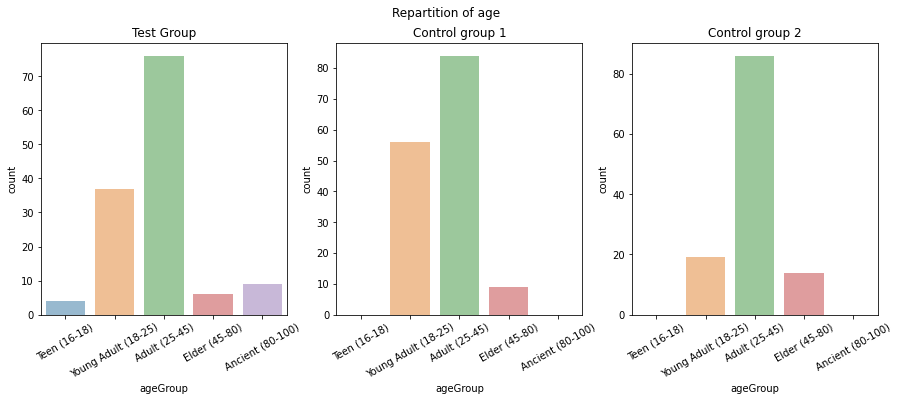

In [10]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
figure.suptitle('Repartition of age')

g = sns.countplot(ax=axes[0],x = 'ageGroup', data=test_group.dropna(), alpha = 0.5, label = 'Age of test group')
h = sns.countplot(ax=axes[1],x = 'ageGroup', data=control_1_group.dropna(), alpha = 0.5, label = 'Age of test group')
i = sns.countplot(ax=axes[2],x = 'ageGroup', data=control_2_group.dropna(), alpha = 0.5, label = 'Age of test group')

g.set_xticklabels(labels = labels, rotation=30)
h.set_xticklabels(labels = labels, rotation=30)
i.set_xticklabels(labels = labels, rotation=30)
axes[0].set_title('Test Group')
axes[1].set_title('Control group 1')
axes[2].set_title('Control group 2')
plt.show()

##### We can see that the group of age are not evenly representated in all groups, we will cut the outliers

In [11]:
#Let's do the same to make sure proportion of attractiveness coefficients are well representated

bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000']
test_group['attraction_group'] = pd.cut(test_group['attraction_coeff'], bins=bins, labels=labels, right=False)
control_1_group['attraction_group'] = pd.cut(control_1_group['attraction_coeff'], bins=bins, labels=labels, right=False)
control_2_group['attraction_group'] = pd.cut(control_2_group['attraction_coeff'], bins=bins, labels=labels, right=False)

beauty_test = test_group.groupby('attraction_group')['uid'].count()
beauty_control_1 = control_1_group.groupby('attraction_group')['uid'].count()
beauty_control_2 = control_2_group.groupby('attraction_group')['uid'].count()


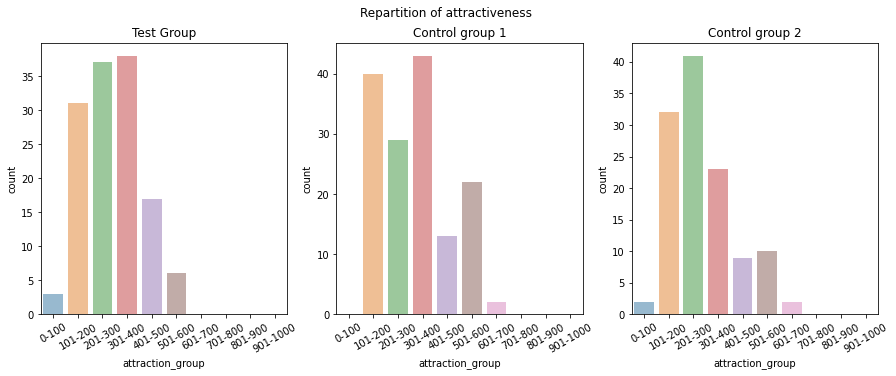

In [12]:
 figure, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
figure.suptitle('Repartition of attractiveness')

g = sns.countplot(ax=axes[0],x = 'attraction_group', data=test_group.dropna(), alpha = 0.5, label = 'Attractiveness of test group')
h = sns.countplot(ax=axes[1],x = 'attraction_group', data=control_1_group.dropna(), alpha = 0.5, label = 'Attractiveness of test group')
i = sns.countplot(ax=axes[2],x = 'attraction_group', data=control_2_group.dropna(), alpha = 0.5, label = 'Attractiveness of test group')

g.set_xticklabels(labels = labels, rotation=30)
h.set_xticklabels(labels = labels, rotation=30)
i.set_xticklabels(labels = labels, rotation=30)
axes[0].set_title('Test Group')
axes[1].set_title('Control group 1')
axes[2].set_title('Control group 2')
plt.show()

##### Attractiveness of all groups are also not evenly distributed

##### Now, lets have a look at the countries represented in each group

In [13]:
countries_test = test_group.dropna()['country_x'].unique()
countries_test = countries_test.tolist()

countries_control_1 = control_1_group.dropna()['country_x'].unique()
countries_control_1 = countries_control_1.tolist()

countries_control_2 = control_2_group.dropna()['country_x'].unique()
countries_control_2 = countries_control_2.tolist()


res1 = [x for x in countries_test + countries_control_1 if x not in countries_test or x not in countries_control_1]
res2 = [x for x in countries_test + countries_control_2 if x not in countries_test or x not in countries_control_2]
res3 = [x for x in countries_control_1 + countries_control_2 if x not in countries_control_1 or x not in countries_control_2]

test1 = [x for x in countries_test + res1 if x in countries_test and x  in res1]
test1 = list(set(test1))

test2 = [x for x in countries_test + res2 if x in countries_test and x  in res2]
test2 = list(set(test2))

test3 = [x for x in countries_control_1 + res1 if x in countries_control_1 and x in res1]
test3 = list(set(test3))

test4 = [x for x in countries_control_2 + res2 if x in countries_control_2 and x in res2]
test4 = list(set(test4))

group1 = [x for x in countries_control_1 + res3 if x in countries_control_1 and x  in res3]
group1 = list(set(group1))

group2 = [x for x in countries_control_2 + res3 if x in countries_control_2 and x  in res3]
group2 = list(set(group2))

In [14]:
print('Test group but not control group 1 : ' + str(test1))
print('Test group but not control group 2 : ' + str(test2))
print('Control group 1 but not test group : ' + str(test3))
print('Control group 2 but not test group : ' + str(test4))
print('Control group 1 but not 2 : ' + str(group1))
print('Control group 2 but not 1 : ' + str(group2))

Test group but not control group 1 : ['Belgium', 'Latvia', 'Germany']
Test group but not control group 2 : ['Canada', 'Latvia']
Control group 1 but not test group : ['Portugal', 'Turkey']
Control group 2 but not test group : ['Portugal', 'Switzerland', 'Turkey', 'Austria']
Control group 1 but not 2 : ['Canada']
Control group 2 but not 1 : ['Belgium', 'Austria', 'Germany', 'Switzerland']


##### Those results are very problematic to analyse the results of an A/B testing. There is a lot of variance in the provenance of users from all groups, which can cause a lot of unwanted and uncalculated variance in understanding if our test was a success or not. There is a lot of variance in behaviors of customers from different countries. When performing A/B testing, we are supposed to minimize the variablility to isolate the factor we are trying to evaluate. 

In [15]:
#Reimporting the data to have full unedited datasets to perform metrics calculation

#Test group
users_test = pd.read_csv('users_test.csv', sep=';')
transactions_test = pd.read_csv('transactions_test.csv', sep=';') 
test_group = users_test.merge(transactions_test,how='inner',on ='uid')

#Control1
users_control_1 = pd.read_csv('users_control_1.csv', sep=';')
transactions_control_1 = pd.read_csv('transactions_control_1.csv', sep=';') 
control_1_group = users_control_1.merge(transactions_control_1,how='inner',on ='uid')

#Control2
users_control_2 = pd.read_csv('users_control_2.csv', sep=';')
transactions_control_2 = pd.read_csv('transactions_control_2.csv', sep=';') 
control_2_group = users_control_2.merge(transactions_control_2,how='inner',on ='uid')

In [16]:
dfs_list = [test_group,control_1_group,control_2_group]

In [17]:
for i in range(0,len(dfs_list)):
    tmp = dfs_list[i][(dfs_list[i]['paid_at']>='2017-01-11')&(dfs_list[i]['paid_at']<='2017-12-11')]
    tmp = tmp[(tmp['joined_at']>='2017-01-11')&(tmp['joined_at']<='2017-10-31')]
    tmp = tmp[(tmp['age']>=18)&(tmp['age']<=80)]
    tmp = tmp[(tmp['attraction_coeff']>=100)&(tmp['attraction_coeff']<=600)]
    tmp = tmp.drop_duplicates()
    dfs_list[i] = tmp

In [18]:
test_group = dfs_list[0]
control_1_group = dfs_list[1]
control_2_group = dfs_list[2]

In [19]:
test_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 272
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               183 non-null    int64  
 1   age               183 non-null    int64  
 2   attraction_coeff  183 non-null    int64  
 3   coins             108 non-null    float64
 4   country_x         183 non-null    object 
 5   visit_days        172 non-null    object 
 6   gender            183 non-null    int64  
 7   age_filter_start  183 non-null    int64  
 8   age_filter_end    183 non-null    int64  
 9   views_count       183 non-null    int64  
 10  was_premium       179 non-null    float64
 11  is_premium        161 non-null    float64
 12  total_revenue     183 non-null    int64  
 13  country_y         183 non-null    object 
 14  joined_at         183 non-null    object 
 15  paid_at           183 non-null    object 
 16  revenue           183 non-null    int64  
 1

In [20]:
control_1_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 0 to 376
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               275 non-null    int64  
 1   age               275 non-null    int64  
 2   attraction_coeff  275 non-null    int64  
 3   coins             178 non-null    float64
 4   country_x         275 non-null    object 
 5   visit_days        271 non-null    object 
 6   gender            275 non-null    int64  
 7   age_filter_start  275 non-null    int64  
 8   age_filter_end    275 non-null    int64  
 9   views_count       275 non-null    int64  
 10  was_premium       256 non-null    float64
 11  is_premium        221 non-null    float64
 12  total_revenue     275 non-null    int64  
 13  country_y         275 non-null    object 
 14  joined_at         275 non-null    object 
 15  paid_at           275 non-null    object 
 16  revenue           275 non-null    float64
 1

Let's see the distribution of revenues received by each client

In [21]:
all_purchases_test = test_group.groupby(['uid'], as_index=False) \
    .agg({'revenue': 'sum'}) \
    .sort_values('revenue') 

all_purchases_1 = control_1_group.groupby(['uid'], as_index=False) \
    .agg({'revenue': 'sum'}) \
    .sort_values('revenue') 

all_purchases_2 = control_2_group.groupby(['uid'], as_index=False) \
    .agg({'revenue': 'sum'}) \
    .sort_values('revenue')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


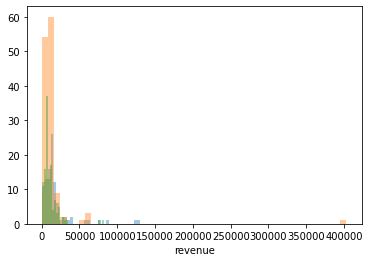

In [22]:
sns.distplot(all_purchases_test.revenue, kde=False)
sns.distplot(all_purchases_1.revenue, kde=False)
sns.distplot(all_purchases_2.revenue, kde=False)

Well, it's not the best visualisation but we still can see that everything that is bigger than 50k could be counted as an outlier. We will remove that part of datasets.

In [23]:
all_purchases_test = all_purchases_test[all_purchases_test['revenue']<=50_000]
all_purchases_1 = all_purchases_1[all_purchases_1['revenue']<=50_000]
all_purchases_2 = all_purchases_2[all_purchases_2['revenue']<=50_000]

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


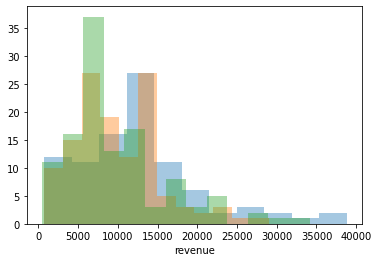

In [24]:
sns.distplot(all_purchases_test.revenue, kde=False)
sns.distplot(all_purchases_1.revenue, kde=False)
sns.distplot(all_purchases_2.revenue, kde=False)

Looks better, now!

# Conclusion on EDA

In this part of project we had chance to take a closer look on data. What we saw:
- Date ranges are different in datasets. Control group 1 has longer range than other datasets, we standartized it.
- In test or control groups, sometime users registered before and made payment after, or the other way around, users paid and then register. In real world I would ask buisness team how the process of registering/paying works to see what do we consider 'new users'. It's important to understad business logics (client experience) before running analysis on data.
- Test group has two additional categories of age (Teen and Ancient). We removed that from our final dataset
- Attractiveness level range in test group is different comparing to conrol groups, we standartized it.
- Set of countries is also different for test and control groups. That is a very bad news that prevented me from futher data analysis. Clients from different countries have way to different life experience (level of life, culture code, etc.). That gives us understanding that our A/B test receives external effect which we cannot really control.
- According to data some clients brought way too big revenues, which appears to be outliers. We cut those lines out.

# 2. Metrics selection

To estimate the result of A/B test we will analyse the most important measure - revenue per client, who made a purchase. We will also evaluate conversion rate regarding to premium and payment.

# 3. Hypothesis testing 

#### After reviewing the datasets, we would already say that we cannot conclude anything from that experiment because of a few factors. First, only by looking at how the test was conducted, we can say that it's not a proper way to conduct an A/B testing. When making research on the effect of something, we usually focus on that one thing. On the test that was conducted, there was too many factors of variability ; the cost of premium subscription, new countries and new payment system. Moreover, we have no details on which countries are the "new" countries which makes it impossible for us to isolate this variable, nor any information about payment system in out dataset and we don't even have information about old and new price for the premium subscription. 

#### However, for the sake of this project, we will conduct some calculation to see statistical differences between the groups.We will be using a confidence interval of 0.05


## 3.1 revenue per client analysis

In [25]:
prep_test = all_purchases_test
prep_test['revenue_not_null'] = prep_test[['revenue']].fillna(value=0)

prep_1 = all_purchases_1
prep_1['revenue_not_null'] = prep_1[['revenue']].fillna(value=0)

prep_2 = all_purchases_2
prep_2['revenue_not_null'] = prep_2[['revenue']].fillna(value=0)

In [26]:
t_group_premium = prep_test['revenue_not_null']
t_1_premium = prep_1['revenue_not_null']
t_2_premium = prep_2['revenue_not_null']

##### The null hypothesis for Levene’s test is that the revenues we're comparing all have equal population variances. Our alpha value (confidence threshold) is 0.05. 
##### If p-value <= 0.05, we will have to reject the null hypotesis, meaning that there would be a statistical difference between the datas in the datasets.

In [27]:
scipy.levene(t_group_premium,t_1_premium, t_2_premium, center='mean')

LeveneResult(statistic=3.457482052205209, pvalue=0.03264812782902047)

We see that p-value is less than threshold of 5%, that means that we reject null hypothesis. There is no homogeneity

#### Since we observed that the variances between our control groups and our test groups are not the same, we need to run a Welch's test instead of a regular Fisher's test

In [28]:
scipy.ttest_ind(t_group_premium,t_1_premium, equal_var = False)

Ttest_indResult(statistic=3.0335884946633422, pvalue=0.0028482656083073554)

In [29]:
scipy.ttest_ind(t_group_premium, t_2_premium, equal_var = False)

Ttest_indResult(statistic=2.7948361910485113, pvalue=0.005767672723147954)

#### There is no significant difference between test group and control groups.

## 3.2 conversion rate analysis

#### We are now going to calculate metrics on conversion rate, to see if our test had any effect on customer subscribing to premium. Our null hypotesis in this test is that there is no significant difference between our test group and control groups regarding the retention rate. We will still be using a confidence level of 5% for our hypotesis testing

In [30]:
alpha = 0.05

In [31]:
#Reimporting the data to have full unedited datasets to perform metrics calculation, but this time let's make the join 
#so we keep datas on users, even those who don't have a transaction, that way we can see who never registered and calculate
#our conversion rates. we will still remove the same outliers we removed to perform our previous analysis

#Test group
users_test = pd.read_csv('users_test.csv', sep=';')
transactions_test = pd.read_csv('transactions_test.csv', sep=';') 
test_group = users_test.merge(transactions_test,how='left',on ='uid')

#Control1
users_control_1 = pd.read_csv('users_control_1.csv', sep=';')
transactions_control_1 = pd.read_csv('transactions_control_1.csv', sep=';') 
control_1_group = users_control_1.merge(transactions_control_1,how='left',on ='uid')

#Control2
users_control_2 = pd.read_csv('users_control_2.csv', sep=';')
transactions_control_2 = pd.read_csv('transactions_control_2.csv', sep=';') 
control_2_group = users_control_2.merge(transactions_control_2,how='left',on ='uid')

In [32]:
dfs_list_2 = [test_group, control_1_group, control_2_group]

for i in range(0,len(dfs_list_2)):
    tmp = dfs_list_2[i]
    tmp = tmp.fillna(value = {'paid_at' : 'unknown', 'joined_at' : 'unknown',
                                      'coins' : 0, 'is_premium' : 0, 'revenue' : 0})
    tmp = tmp[(tmp['paid_at']>='2017-01-11')&(tmp['paid_at']<='2017-12-11') | (tmp['paid_at'] == 'unknown')]
    tmp = tmp[(tmp['joined_at']>='2017-01-11')&(tmp['joined_at']<='2017-10-31') | (tmp['joined_at'] == 'unknown')]
    tmp = tmp[(tmp['age']>=18)&(tmp['age']<=80)]
    tmp = tmp[(tmp['attraction_coeff']>=100)&(tmp['attraction_coeff']<=600)]
    tmp = tmp.drop_duplicates()
    dfs_list_2[i] = tmp
    
test_group = dfs_list_2[0]
control_1_group = dfs_list_2[1]
control_2_group = dfs_list_2[2]

#### Let's now prepare our data for our first test on conversion rate. We will here look if the proportion of people who subscribed in our test group is bigger then the proportion of people who subscribed in our control groups. We are considering that our test group is the observed test that we will analyse against our control groups, our "expected" result.

In [33]:
test_subscribed = list(test_group.groupby('is_premium')['uid'].count())
control_1_subscribed = list(control_1_group.groupby('is_premium')['uid'].count())
control_2_subscribed = list(control_2_group.groupby('is_premium')['uid'].count())

In [34]:
#Let's calculate our totals for columns and rows, since it's required to calculate our chi2 expected values

subscribe_list = test_subscribed, control_1_subscribed, control_2_subscribed
subscribe = pd.DataFrame(subscribe_list, columns=['not_subscribed', 'subscribed'], index = ['test_group', 'control_1', 'control_2'])
subscribe.loc[:,'total_row'] = subscribe.sum(axis = 1)
subscribe.loc["total_column"] = subscribe.sum()

In [35]:
subscribe

,not_subscribed,subscribed,total_row
test_group,1616,176,1792
control_1,1630,245,1875
control_2,1562,219,1781
total_column,4808,640,5448


##### we now need to calculate our expected values

In [36]:
subscribe_expected =  np.outer(subscribe["total_row"][0:3],
                     subscribe.loc["total_column"][0:2]) / (subscribe['total_row']['total_column'])
 
subscribe_expected = pd.DataFrame(subscribe_expected)
 
subscribe_expected.columns = ["not_subscribed","subscribed"]
subscribe_expected.index = ["test_group","control_1","control_2"]
expected = subscribe_expected.copy()
subscribe_expected.loc[:,'total_row'] = subscribe_expected.sum(axis = 1)
subscribe_expected.loc["total_column"] = subscribe_expected.sum()

In [37]:
observed = subscribe.iloc[0:3,0:2]

In [38]:
observed_test = [subscribe['not_subscribed'][0], subscribe['subscribed'][0]]
observed_control_1 = [subscribe['not_subscribed'][1], subscribe['subscribed'][1]]
observed_control_2 = [subscribe['not_subscribed'][2], subscribe['subscribed'][2]]

expected_test = [subscribe_expected['not_subscribed'][0], subscribe_expected['subscribed'][0]]
expected_control_1 = [subscribe_expected['not_subscribed'][1], subscribe_expected['subscribed'][1]]
expected_control_2 = [subscribe_expected['not_subscribed'][2], subscribe_expected['subscribed'][2]]


In [39]:
# Perform the chi-squared test on the test group
chi2, p = scipy.chisquare(observed_test, f_exp=expected_test)

# Print the test statistic and p-value
print("Chi-squared test statistic:", chi2)



print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0), there is a dependency between being a member of the test group and subscribing to premium')
else:
    print('Independent (H0 holds true)m there is no dependency between being a member of the test group and subscribing to \npremium')

Chi-squared test statistic: 6.411816615165199
p value is 0.011336337696838927
Dependent (reject H0), there is a dependency between being a member of the test group and subscribing to premium


In [40]:
# Perform the chi-squared test on control group 1
chi2, p = scipy.chisquare(observed_control_1, f_exp=expected_control_1)

# Print the test statistic and p-value
print("Chi-squared test statistic:", chi2)


print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0), there is a dependency between being a member of the first control group and subscribing to premium')
else:
    print('Independent (H0 holds true), there is no dependency between being a member of the first control group and subscribing to \npremium')

Chi-squared test statistic: 3.1475765391015025
p value is 0.07603981873996193
Independent (H0 holds true), there is no dependency between being a member of the first control group and subscribing to 
premium


In [41]:
# Perform the chi-squared test on control group 2
chi2, p = scipy.chisquare(observed_control_2, f_exp=expected_control_2)

# Print the test statistic and p-value
print("Chi-squared test statistic:", chi2)

print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0), there is a dependency between being a member of the second control group and subscribing to premium')
else:
    print('Independent (H0 holds true), there is no dependency between being a member of the second control group and subscribing to \npremium')

Chi-squared test statistic: 0.517832914167946
p value is 0.47176756586309554
Independent (H0 holds true), there is no dependency between being a member of the second control group and subscribing to 
premium


In [42]:
subscribe

,not_subscribed,subscribed,total_row
test_group,1616,176,1792
control_1,1630,245,1875
control_2,1562,219,1781
total_column,4808,640,5448


In [92]:
subscribe_expected

,not_subscribed,subscribed,total_row
test_group,1581.486050,210.513950,1792.0
control_1,1654.735683,220.264317,1875.0
control_2,1571.778267,209.221733,1781.0
total_column,4808.000000,640.000000,5448.0


We saw while performing chi-square that there is a dependency between being a member of the test group and being subscribed to premium. When we look at the number and the difference between expected value and actual value, we can see that the dependency is a negative one. In other words, members of the test group tend to subscribe to premium less then member of the control groups. We can say that the experiement on A/B testing was not a success.

##### Let's now apply the chi-square test to see if there's a dependency in having a revenue or not.

In [64]:
test_group['paid'] = test_group['total_revenue']
control_1_group['paid'] = control_1_group['total_revenue']
control_2_group['paid'] = control_2_group['total_revenue']

m = test_group['total_revenue'] == 0
test_group['paid'] = test_group['total_revenue'].where(m, 1)

n = control_1_group['total_revenue'] == 0
control_1_group['paid'] = control_1_group['total_revenue'].where(n, 1)

o = control_2_group['total_revenue'] == 0
control_2_group['paid'] = control_2_group['total_revenue'].where(o, 1)

In [67]:
test_paid = list(test_group.groupby('paid')['uid'].count())
control_1_paid = list(control_1_group.groupby('paid')['uid'].count())
control_2_paid = list(control_2_group.groupby('paid')['uid'].count())

In [78]:
#Let's calculate our totals for columns and rows, since it's required to calculate our chi2 expected values

paid_list = test_paid, control_1_paid, control_2_paid
paid = pd.DataFrame(paid_list, columns=['not_paid', 'paid'], index = ['test_group', 'control_1', 'control_2'])
paid.loc[:,'total_row'] = paid.sum(axis = 1)
paid.loc["total_column"] = paid.sum()

observed_paid_values = paid.iloc[0:3,0:2]

##### Now, let's calculate our expected values

In [80]:
paid_expected =  np.outer(paid["total_row"][0:3],
                     paid.loc["total_column"][0:2]) / (paid['total_row']['total_column'])
 
paid_expected = pd.DataFrame(paid_expected)

paid_expected.columns = ["not_paid","paid"]
paid_expected.index = ["test_group","control_1","control_2"]
expected_paid_values = paid_expected.copy()
paid_expected.loc[:,'total_row'] = paid_expected.sum(axis = 1)
paid_expected.loc["total_column"] = paid_expected.sum()

In [83]:
observed_paid_test = [observed_paid_values['not_paid'][0], observed_paid_values['paid'][0]]
observed_paid_test_1 = [observed_paid_values['not_paid'][1], observed_paid_values['paid'][1]]
observed_paid_test_2 = [observed_paid_values['not_paid'][2], observed_paid_values['paid'][2]]

expected_paid_values_test = [expected_paid_values['not_paid'][0], expected_paid_values['paid'][0]]
expected_paid_values_1 = [expected_paid_values['not_paid'][1], expected_paid_values['paid'][1]]
expected_paid_values_2 = [expected_paid_values['not_paid'][2], expected_paid_values['paid'][2]]


In [85]:
# Perform the chi-squared test on the test group
chi2, p = scipy.chisquare(observed_paid_test, f_exp=expected_paid_values_test)

# Print the test statistic and p-value
print("Chi-squared test statistic:", chi2)



print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0), there is a dependency between being a member of the test group and subscribing to premium')
else:
    print('Independent (H0 holds true)m there is no dependency between being a member of the test group and subscribing to \npremium')

Chi-squared test statistic: 10.018726237152563
p value is 0.0015495659577059245
Dependent (reject H0), there is a dependency between being a member of the test group and subscribing to premium


In [86]:
# Perform the chi-squared test on control group 1
chi2, p = scipy.chisquare(observed_paid_test_1, f_exp=expected_paid_values_1)

# Print the test statistic and p-value
print("Chi-squared test statistic:", chi2)


print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0), there is a dependency between being a member of the first control group and subscribing to premium')
else:
    print('Independent (H0 holds true), there is no dependency between being a member of the first control group and subscribing to \npremium')

Chi-squared test statistic: 6.527479739617007
p value is 0.010622035530602281
Dependent (reject H0), there is a dependency between being a member of the first control group and subscribing to premium


In [87]:
# Perform the chi-squared test on control group 2
chi2, p = scipy.chisquare(observed_paid_test_2, f_exp=expected_paid_values_2)

# Print the test statistic and p-value
print("Chi-squared test statistic:", chi2)

print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0), there is a dependency between being a member of the second control group and subscribing to premium')
else:
    print('Independent (H0 holds true), there is no dependency between being a member of the second control group and subscribing to \npremium')

Chi-squared test statistic: 0.306415016432114
p value is 0.5798884518689369
Independent (H0 holds true), there is no dependency between being a member of the second control group and subscribing to 
premium


##### From those results, we can see that there are dependency both in test group and in the first control group. The dependency in the test group is to be expected, but it's bad for our analysis that there is also a dependency in the first control group, since the control groups are supposed to be the stable basis. Let's see in which directions the dependencies we evaluated pulls us.

In [91]:
paid_expected

,not_paid,paid,total_row
test_group,1564.381791,227.618209,1792.0
control_1,1636.839207,238.160793,1875.0
control_2,1554.779001,226.220999,1781.0
total_column,4756.000000,692.000000,5448.0


In [90]:
paid

,not_paid,paid,total_row
test_group,1609,183,1792
control_1,1600,275,1875
control_2,1547,234,1781
total_column,4756,692,5448


We can see by looking at the numbers in our dataframes that the expected count of paid users in the test group is much higher than observed, meaning that there our A/B testing was not a success. Less users made a payment in the test group than they used to do when we were not performing our A/B test.

We can also see that our observed control group 1 is higher than our expected value. This is bad, since it implies that the variance between our two control groups was significantly too high.

# Conclusion on hypothesis testing

We run some statistical tests on applicable data and stated that variance in revenues of groups are significantly different from each other. That was the reason to run a Welch's test instead of a regular Fisher's test. Welch's test showed us that mean of test group was not significantly different from means of both controls. That means that offering another pricing with only two new payment methodes doesn't bring more revenue.

We saw while performing chi-square that there is a dependency between being a member of the test group and being subscribed to premium. When we look at the number and the difference between expected value and actual value, we can see that the dependency is a negative one. In other words, members of the test group tend to subscribe to premium less then member of the control groups. We can say that the experiement on A/B testing was not a success.

Less users made a payment in the test group than they used to do when we were not performing our A/B test. This is an other proof of the failure of our test.

In conclusion, we would have to say that the A/B testing was not a success. We believe that this experiment was doomed from the start, since the team tried to analyse multiple variables all at once, where A/B testing is supposed to be focused on looking at the effect of one variable on the regular activity. I would recommend to try this experiment on only one heterogeneous group to get more accurate data. 